In [1]:
##1. I have choosen the movie rating topic to scrap the data

In [2]:
##2. I have used  IMDB website to scrape the data from the domain and use case for choosen

## EXTRACT THE DATA

In [4]:
url="https://www.imdb.com/search/title/?genres=Sci-Fi&ref_=nv_sr_srsg_0"## URL from which I have extracted the data for scrapping

In [5]:
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
import requests
from time import sleep
from random import randint
import numpy as np, pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
import time

##Functions used for the extracting the data

In [6]:
page=requests.get(url)
page.status_code
##To check whether the website allows to scrap the data or not if returns 200 the website allows to scrap the data

200

In [7]:
pagecontent=page.text
pagecontent
##To extract the total contact from the desired website

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 50 Sci-Fi Movies and TV Shows - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n        <link rel="canonical" href="https://www.imdb.com/search/title/?gen

In [8]:
soup=BeautifulSoup(pagecontent)
soup
##BeautifulSoup is a python library used to clean the HTML data 

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 50 Sci-Fi Movies and TV Shows - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?genres=sci-fi" rel="canonical"/>
<meta content="http://www.imdb.com/search/title/?genres=sci-fi" property="og:url"/>
<script>
   

In [9]:
## To print the movie name from the webpage using the attributes
a=soup.find('h3',attrs={'class' :"lister-item-header"})
b=a.find('a').contents[0]
b

'The Last of Us'

In [10]:
##To print the movie ratings from the webpage using the attributes
soup.find_all('strong')

[<strong>Detailed</strong>,
 <strong>Popularity</strong>,
 <strong>9.3</strong>,
 <strong>7.8</strong>,
 <strong>8.0</strong>,
 <strong>6.4</strong>,
 <strong>6.9</strong>,
 <strong>5.4</strong>,
 <strong>9.1</strong>,
 <strong>8.7</strong>,
 <strong>8.7</strong>,
 <strong>8.7</strong>,
 <strong>8.4</strong>,
 <strong>8.7</strong>,
 <strong>7.9</strong>,
 <strong>8.0</strong>,
 <strong>8.0</strong>,
 <strong>5.8</strong>,
 <strong>7.7</strong>,
 <strong>7.1</strong>,
 <strong>5.9</strong>,
 <strong>7.8</strong>,
 <strong>8.6</strong>,
 <strong>8.0</strong>,
 <strong>9.7</strong>,
 <strong>6.4</strong>,
 <strong>7.7</strong>,
 <strong>8.8</strong>,
 <strong>5.6</strong>,
 <strong>8.4</strong>,
 <strong>6.9</strong>,
 <strong>8.4</strong>,
 <strong>8.6</strong>,
 <strong>7.1</strong>,
 <strong>8.3</strong>,
 <strong>7.8</strong>,
 <strong>8.6</strong>,
 <strong>6.8</strong>,
 <strong>7.6</strong>,
 <strong>8.0</strong>,
 <strong>8.7</strong>,
 <strong>7.6</strong>,
 <strong>7.7</strong>,

In [11]:
##To find the movie type from the webpage
soup.find_all('span',attrs={'class' : "genre"})

[<span class="genre">
 Action, Adventure, Drama            </span>,
 <span class="genre">
 Action, Adventure, Fantasy            </span>,
 <span class="genre">
 Action, Adventure, Comedy            </span>,
 <span class="genre">
 Horror, Sci-Fi, Thriller            </span>,
 <span class="genre">
 Crime, Horror, Mystery            </span>,
 <span class="genre">
 Action, Adventure, Drama            </span>,
 <span class="genre">
 Animation, Adventure, Comedy            </span>,
 <span class="genre">
 Action, Adventure, Fantasy            </span>,
 <span class="genre">
 Action, Comedy, Crime            </span>,
 <span class="genre">
 Drama, Fantasy, Horror            </span>,
 <span class="genre">
 Action, Adventure, Drama            </span>,
 <span class="genre">
 Drama, Mystery, Sci-Fi            </span>,
 <span class="genre">
 Action, Adventure, Fantasy            </span>,
 <span class="genre">
 Action, Adventure, Comedy            </span>,
 <span class="genre">
 Action, Adventure, Com

In [12]:
## To find the year of release 
soup.find_all('span', attrs = {'class':'unbold'})

[<span class="lister-item-index unbold text-primary">1.</span>,
 <span class="lister-item-year text-muted unbold">(2023– )</span>,
 <span class="lister-item-index unbold text-primary">2.</span>,
 <span class="lister-item-year text-muted unbold">(2022)</span>,
 <span class="lister-item-index unbold text-primary">3.</span>,
 <span class="lister-item-year text-muted unbold">(2022)</span>,
 <span class="lister-item-index unbold text-primary">4.</span>,
 <span class="lister-item-year text-muted unbold">(2022)</span>,
 <span class="lister-item-index unbold text-primary">5.</span>,
 <span class="lister-item-year text-muted unbold">(2023)</span>,
 <span class="lister-item-index unbold text-primary">6.</span>,
 <span class="lister-item-year text-muted unbold">(2023)</span>,
 <span class="lister-item-index unbold text-primary">7.</span>,
 <span class="lister-item-year text-muted unbold">(2013– )</span>,
 <span class="lister-item-index unbold text-primary">8.</span>,
 <span class="lister-item-yea

In [13]:
## To find the metascore of the movie
soup.find_all('span', attrs = {'class':'favorable'})

[<span class="metascore favorable">67        </span>,
 <span class="metascore favorable">81        </span>,
 <span class="metascore favorable">72        </span>,
 <span class="metascore favorable">72        </span>,
 <span class="metascore favorable">83        </span>,
 <span class="metascore favorable">67        </span>,
 <span class="metascore favorable">70        </span>,
 <span class="metascore favorable">77        </span>,
 <span class="metascore favorable">74        </span>,
 <span class="metascore favorable">74        </span>,
 <span class="metascore favorable">65        </span>,
 <span class="metascore favorable">74        </span>,
 <span class="metascore favorable">71        </span>]

In [14]:
## To find the number of votes for movie
soup.find_all('span', attrs = {'name':'nv'})

[<span data-value="149988" name="nv">149,988</span>,
 <span data-value="276907" name="nv">276,907</span>,
 <span data-value="312460" name="nv">312,460</span>,
 <span data-value="49119" name="nv">49,119</span>,
 <span data-value="2971" name="nv">2,971</span>,
 <span data-value="6268" name="nv">6,268</span>,
 <span data-value="534756" name="nv">534,756</span>,
 <span data-value="493435" name="nv">493,435</span>,
 <span data-value="521378" name="nv">521,378</span>,
 <span data-value="1207719" name="nv">1,207,719</span>,
 <span data-value="116698" name="nv">116,698</span>,
 <span data-value="133610" name="nv">133,610</span>,
 <span data-value="1316490" name="nv">1,316,490</span>,
 <span data-value="760,507,625" name="nv">$760.51M</span>,
 <span data-value="2791" name="nv">2,791</span>,
 <span data-value="5463" name="nv">5,463</span>,
 <span data-value="9001" name="nv">9,001</span>,
 <span data-value="74967" name="nv">74,967</span>,
 <span data-value="158378" name="nv">158,378</span>,
 <spa

In [15]:
## To find the runtime of the movie
soup.find_all('span', attrs = {'class':'runtime'})

[<span class="runtime">50 min</span>,
 <span class="runtime">192 min</span>,
 <span class="runtime">139 min</span>,
 <span class="runtime">102 min</span>,
 <span class="runtime">117 min</span>,
 <span class="runtime">98 min</span>,
 <span class="runtime">23 min</span>,
 <span class="runtime">40 min</span>,
 <span class="runtime">60 min</span>,
 <span class="runtime">51 min</span>,
 <span class="runtime">40 min</span>,
 <span class="runtime">55 min</span>,
 <span class="runtime">162 min</span>,
 <span class="runtime">125 min</span>,
 <span class="runtime">25 min</span>,
 <span class="runtime">173 min</span>,
 <span class="runtime">51 min</span>,
 <span class="runtime">50 min</span>,
 <span class="runtime">161 min</span>,
 <span class="runtime">114 min</span>,
 <span class="runtime">45 min</span>,
 <span class="runtime">60 min</span>,
 <span class="runtime">125 min</span>,
 <span class="runtime">60 min</span>,
 <span class="runtime">147 min</span>,
 <span class="runtime">60 min</span>,
 

In [16]:
## To find the certification of the movie
soup.find_all('span', attrs = {'class':'certificate'})

[<span class="certificate">UA 16+</span>,
 <span class="certificate">UA</span>,
 <span class="certificate">A</span>,
 <span class="certificate">A</span>,
 <span class="certificate">R</span>,
 <span class="certificate">UA 13+</span>,
 <span class="certificate">16+</span>,
 <span class="certificate">U</span>,
 <span class="certificate">18+</span>,
 <span class="certificate">15</span>,
 <span class="certificate">UA 13+</span>,
 <span class="certificate">A</span>,
 <span class="certificate">UA</span>,
 <span class="certificate">PG-13</span>,
 <span class="certificate">A</span>,
 <span class="certificate">UA 16+</span>,
 <span class="certificate">18</span>,
 <span class="certificate">UA</span>,
 <span class="certificate">PG</span>,
 <span class="certificate">U</span>,
 <span class="certificate">A</span>,
 <span class="certificate">UA</span>,
 <span class="certificate">UA 16+</span>,
 <span class="certificate">A</span>,
 <span class="certificate">UA</span>,
 <span class="certificate">A</span

In [17]:
## Code using the for loop for prints the multiple pages of the data at same time
moviename=[]
rating=[]
metascore=[]
movietype=[]
releaseyear=[]
votes=[]
runtime=[]
certificate=[]


for i in range(1,10):
    start_time = time.time()
    URL="https://www.imdb.com/search/title/?genres=Sci-Fi&ref_=nv_sr_srsg_0".format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    for x in soup.find_all('div', attrs = {'class':'lister-item-content'}):
        a=x.find('h3',attrs={'class' :"lister-item-header"})
        movie=a.find('a').contents[0]
        rat = x.find('strong')
        meta = x.find('span', attrs = {'class':'favorable'})
        movt = x.find('span', attrs = {'class':'genre'})
        year= x.find('span', attrs = {'class':'lister-item-year text-muted unbold'})
        vot=x.find('span', attrs = {'name':'nv'})
        run=x.find('span', attrs = {'class':'runtime'})
        cer=x.find('span', attrs = {'class':'certificate'})
        if movie is None:
            moviename.append(np.NaN)
        else:
            moviename.append(movie)
        
        if rat is None:
            rating.append(np.NaN)
        else:
            rating.append(rat.text)
            
        if meta is None:
            metascore.append(np.NaN)
        else:
            metascore.append(meta.text)
            
        if movt is None:
            movietype.append(np.NaN)
        else:
            movietype.append(movt.text)
            
        if year is None:
            releaseyear.append(np.NaN)
        else:
            releaseyear.append(year.text)
            
        if vot is None:
            votes.append(np.NaN)
        else:
            votes.append(vot.text)
            
        if run is None:
            runtime.append(np.NaN)
        else:
            runtime.append(run.text)
            
        if cer is None:
            certificate.append(np.NaN)
        else:
            certificate.append(cer.text)
            
        
    print('Page {} completed in {} seconds'.format(i, time.time() - start_time))

Page 1 completed in 1.4948179721832275 seconds
Page 2 completed in 1.7557203769683838 seconds
Page 3 completed in 1.4865446090698242 seconds
Page 4 completed in 1.5663855075836182 seconds
Page 5 completed in 2.543025493621826 seconds
Page 6 completed in 1.640028715133667 seconds
Page 7 completed in 1.5738251209259033 seconds
Page 8 completed in 1.6987991333007812 seconds
Page 9 completed in 1.631058931350708 seconds


In [18]:
## To find the length of all the coloumns 
len(votes)
len(moviename)
len(rating)
len(metascore)
len(movietype)
len(releaseyear)
len(runtime)
len(certificate)


450

## TO CREATE THE DATA FRAME

In [19]:
imdb_df=pd.DataFrame({'Moviename': moviename,'Rating': rating,'Metascore': metascore,'Movietype': movietype,'Releaseyear': releaseyear,'Votes':votes,'Runtime':runtime,'Certificate':certificate})
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"\nAction, Adventure, Drama",(2023– ),"149,988",50 min,UA 16+
1,Avatar: The Way of Water,7.8,67,"\nAction, Adventure, Fantasy",(2022),"276,907",192 min,UA
2,Everything Everywhere All at Once,8.0,81,"\nAction, Adventure, Comedy",(2022),"312,460",139 min,A
3,M3GAN,6.4,72,"\nHorror, Sci-Fi, Thriller",(2022),"49,119",102 min,A
4,Infinity Pool,6.9,72,"\nCrime, Horror, Mystery",(2023),"2,971",117 min,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,NaN,NaN,"\nDrama, Sci-Fi",,NaN,NaN,NaN
446,Strange World,5.6,65,"\nAnimation, Action, Adventure",(2022),"33,049",102 min,PG
447,Inception,8.8,74,"\nAction, Adventure, Sci-Fi",(2010),"2,368,367",148 min,UA
448,Spider-Man: No Way Home,8.2,71,"\nAction, Adventure, Fantasy",(2021),"766,441",148 min,UA


## EXPORT INTO .CSV FILE

In [20]:
imdb_df.to_csv('imdb_df.csv',index=True)

## READ CSV FILE

In [21]:
##coloumns we have in data frame
imdb_df.columns

Index(['Moviename', 'Rating', 'Metascore', 'Movietype', 'Releaseyear', 'Votes',
       'Runtime', 'Certificate'],
      dtype='object')

In [22]:
##rows we have in data frame
print (len (imdb_df.index))

450


In [23]:
##Data type of each coloumns
result = imdb_df.dtypes
print(result)

Moviename      object
Rating         object
Metascore      object
Movietype      object
Releaseyear    object
Votes          object
Runtime        object
Certificate    object
dtype: object


In [24]:
##To find the missing values
imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Moviename    450 non-null    object
 1   Rating       423 non-null    object
 2   Metascore    117 non-null    object
 3   Movietype    450 non-null    object
 4   Releaseyear  450 non-null    object
 5   Votes        423 non-null    object
 6   Runtime      405 non-null    object
 7   Certificate  414 non-null    object
dtypes: object(8)
memory usage: 28.2+ KB


## CLEANING THE DATA

In [25]:
## To remove \n for the movietype coloumn 
imdb_df['Movietype']=imdb_df['Movietype'].replace({'\n':''},regex=True)
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"Action, Adventure, Drama",(2023– ),"149,988",50 min,UA 16+
1,Avatar: The Way of Water,7.8,67,"Action, Adventure, Fantasy",(2022),"276,907",192 min,UA
2,Everything Everywhere All at Once,8.0,81,"Action, Adventure, Comedy",(2022),"312,460",139 min,A
3,M3GAN,6.4,72,"Horror, Sci-Fi, Thriller",(2022),"49,119",102 min,A
4,Infinity Pool,6.9,72,"Crime, Horror, Mystery",(2023),"2,971",117 min,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,NaN,NaN,"Drama, Sci-Fi",,NaN,NaN,NaN
446,Strange World,5.6,65,"Animation, Action, Adventure",(2022),"33,049",102 min,PG
447,Inception,8.8,74,"Action, Adventure, Sci-Fi",(2010),"2,368,367",148 min,UA
448,Spider-Man: No Way Home,8.2,71,"Action, Adventure, Fantasy",(2021),"766,441",148 min,UA


In [26]:
## To remove the unwanted data from the coloumns
imdb_df['Runtime']=imdb_df['Runtime'].replace({'min':''},regex=True)
imdb_df['Votes']=imdb_df['Votes'].replace({',':''},regex=True)
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"Action, Adventure, Drama",(2023– ),149988,50,UA 16+
1,Avatar: The Way of Water,7.8,67,"Action, Adventure, Fantasy",(2022),276907,192,UA
2,Everything Everywhere All at Once,8.0,81,"Action, Adventure, Comedy",(2022),312460,139,A
3,M3GAN,6.4,72,"Horror, Sci-Fi, Thriller",(2022),49119,102,A
4,Infinity Pool,6.9,72,"Crime, Horror, Mystery",(2023),2971,117,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,NaN,NaN,"Drama, Sci-Fi",,NaN,NaN,NaN
446,Strange World,5.6,65,"Animation, Action, Adventure",(2022),33049,102,PG
447,Inception,8.8,74,"Action, Adventure, Sci-Fi",(2010),2368367,148,UA
448,Spider-Man: No Way Home,8.2,71,"Action, Adventure, Fantasy",(2021),766441,148,UA


In [27]:
##To remove () from the release year coloumn
imdb_df['Releaseyear'] = imdb_df['Releaseyear'].str.replace("(", "")
imdb_df['Releaseyear'] = imdb_df['Releaseyear'].str.replace(")", "")
imdb_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_17524\97925578.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_df['Releaseyear'] = imdb_df['Releaseyear'].str.replace("(", "")
C:\Users\DELL\AppData\Local\Temp\ipykernel_17524\97925578.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_df['Releaseyear'] = imdb_df['Releaseyear'].str.replace(")", "")


,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"Action, Adventure, Drama",2023–,149988,50,UA 16+
1,Avatar: The Way of Water,7.8,67,"Action, Adventure, Fantasy",2022,276907,192,UA
2,Everything Everywhere All at Once,8.0,81,"Action, Adventure, Comedy",2022,312460,139,A
3,M3GAN,6.4,72,"Horror, Sci-Fi, Thriller",2022,49119,102,A
4,Infinity Pool,6.9,72,"Crime, Horror, Mystery",2023,2971,117,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,NaN,NaN,"Drama, Sci-Fi",,NaN,NaN,NaN
446,Strange World,5.6,65,"Animation, Action, Adventure",2022,33049,102,PG
447,Inception,8.8,74,"Action, Adventure, Sci-Fi",2010,2368367,148,UA
448,Spider-Man: No Way Home,8.2,71,"Action, Adventure, Fantasy",2021,766441,148,UA


In [28]:
## To fill all the null values
imdb_df=imdb_df.fillna(method="ffill")
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"Action, Adventure, Drama",2023–,149988,50,UA 16+
1,Avatar: The Way of Water,7.8,67,"Action, Adventure, Fantasy",2022,276907,192,UA
2,Everything Everywhere All at Once,8.0,81,"Action, Adventure, Comedy",2022,312460,139,A
3,M3GAN,6.4,72,"Horror, Sci-Fi, Thriller",2022,49119,102,A
4,Infinity Pool,6.9,72,"Crime, Horror, Mystery",2023,2971,117,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,6.3,74,"Drama, Sci-Fi",,340767,118,UA
446,Strange World,5.6,65,"Animation, Action, Adventure",2022,33049,102,PG
447,Inception,8.8,74,"Action, Adventure, Sci-Fi",2010,2368367,148,UA
448,Spider-Man: No Way Home,8.2,71,"Action, Adventure, Fantasy",2021,766441,148,UA


In [29]:
##To converting the datatypes of coloumns
imdb_df['Rating']=imdb_df['Rating'].astype(float)
imdb_df['Metascore']=imdb_df['Metascore'].astype(float)
imdb_df['Runtime']=imdb_df['Runtime'].astype(float)
imdb_df['Votes']=imdb_df['Votes'].astype(float)
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"Action, Adventure, Drama",2023–,149988.0,50.0,UA 16+
1,Avatar: The Way of Water,7.8,67.0,"Action, Adventure, Fantasy",2022,276907.0,192.0,UA
2,Everything Everywhere All at Once,8.0,81.0,"Action, Adventure, Comedy",2022,312460.0,139.0,A
3,M3GAN,6.4,72.0,"Horror, Sci-Fi, Thriller",2022,49119.0,102.0,A
4,Infinity Pool,6.9,72.0,"Crime, Horror, Mystery",2023,2971.0,117.0,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,6.3,74.0,"Drama, Sci-Fi",,340767.0,118.0,UA
446,Strange World,5.6,65.0,"Animation, Action, Adventure",2022,33049.0,102.0,PG
447,Inception,8.8,74.0,"Action, Adventure, Sci-Fi",2010,2368367.0,148.0,UA
448,Spider-Man: No Way Home,8.2,71.0,"Action, Adventure, Fantasy",2021,766441.0,148.0,UA


In [30]:
imdb_df['Releaseyear']=imdb_df['Releaseyear'].str.extract('(\d+)') 
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,"Action, Adventure, Drama",2023,149988.0,50.0,UA 16+
1,Avatar: The Way of Water,7.8,67.0,"Action, Adventure, Fantasy",2022,276907.0,192.0,UA
2,Everything Everywhere All at Once,8.0,81.0,"Action, Adventure, Comedy",2022,312460.0,139.0,A
3,M3GAN,6.4,72.0,"Horror, Sci-Fi, Thriller",2022,49119.0,102.0,A
4,Infinity Pool,6.9,72.0,"Crime, Horror, Mystery",2023,2971.0,117.0,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,6.3,74.0,"Drama, Sci-Fi",NaN,340767.0,118.0,UA
446,Strange World,5.6,65.0,"Animation, Action, Adventure",2022,33049.0,102.0,PG
447,Inception,8.8,74.0,"Action, Adventure, Sci-Fi",2010,2368367.0,148.0,UA
448,Spider-Man: No Way Home,8.2,71.0,"Action, Adventure, Fantasy",2021,766441.0,148.0,UA


In [31]:
imdb_df['Movietype']=imdb_df['Movietype'].str.extract('(\w+)') 
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,Action,2023,149988.0,50.0,UA 16+
1,Avatar: The Way of Water,7.8,67.0,Action,2022,276907.0,192.0,UA
2,Everything Everywhere All at Once,8.0,81.0,Action,2022,312460.0,139.0,A
3,M3GAN,6.4,72.0,Horror,2022,49119.0,102.0,A
4,Infinity Pool,6.9,72.0,Crime,2023,2971.0,117.0,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,6.3,74.0,Drama,NaN,340767.0,118.0,UA
446,Strange World,5.6,65.0,Animation,2022,33049.0,102.0,PG
447,Inception,8.8,74.0,Action,2010,2368367.0,148.0,UA
448,Spider-Man: No Way Home,8.2,71.0,Action,2021,766441.0,148.0,UA


In [63]:
imdb_df=imdb_df.fillna(method="ffill")
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,NaN,Action,2023,149988.0,50.0,UA 16+
1,Avatar: The Way of Water,7.8,67.0,Action,2022,276907.0,192.0,UA
2,Everything Everywhere All at Once,8.0,81.0,Action,2022,312460.0,139.0,A
3,M3GAN,6.4,72.0,Horror,2022,49119.0,102.0,A
4,Infinity Pool,6.9,72.0,Crime,2023,2971.0,117.0,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,6.3,74.0,Drama,2022,340767.0,118.0,UA
446,Strange World,5.6,65.0,Animation,2022,33049.0,102.0,PG
447,Inception,8.8,74.0,Action,2010,2368367.0,148.0,UA
448,Spider-Man: No Way Home,8.2,71.0,Action,2021,766441.0,148.0,UA


In [66]:
imdb_df['Metascore']=imdb_df ['Metascore'].fillna(imdb_df ['Metascore'].median()) 
imdb_df

,Moviename,Rating,Metascore,Movietype,Releaseyear,Votes,Runtime,Certificate
0,The Last of Us,9.3,74.0,Action,2023,149988.0,50.0,UA 16+
1,Avatar: The Way of Water,7.8,67.0,Action,2022,276907.0,192.0,UA
2,Everything Everywhere All at Once,8.0,81.0,Action,2022,312460.0,139.0,A
3,M3GAN,6.4,72.0,Horror,2022,49119.0,102.0,A
4,Infinity Pool,6.9,72.0,Crime,2023,2971.0,117.0,R
...,...,...,...,...,...,...,...,...
445,Megalopolis,6.3,74.0,Drama,2022,340767.0,118.0,UA
446,Strange World,5.6,65.0,Animation,2022,33049.0,102.0,PG
447,Inception,8.8,74.0,Action,2010,2368367.0,148.0,UA
448,Spider-Man: No Way Home,8.2,71.0,Action,2021,766441.0,148.0,UA


In [67]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Moviename    450 non-null    object 
 1   Rating       450 non-null    float64
 2   Metascore    450 non-null    float64
 3   Movietype    450 non-null    object 
 4   Releaseyear  450 non-null    object 
 5   Votes        450 non-null    float64
 6   Runtime      450 non-null    float64
 7   Certificate  450 non-null    object 
dtypes: float64(4), object(4)
memory usage: 28.2+ KB


In [68]:
imdb_df.isna().sum()

Moviename      0
Rating         0
Metascore      0
Movietype      0
Releaseyear    0
Votes          0
Runtime        0
Certificate    0
dtype: int64

## DATA ANALYSIS AND VISUALIZATION


In [32]:
imdb_df.describe()

,Rating,Metascore,Votes,Runtime
count,450.000000,449.000000,4.500000e+02,450.000000
mean,7.772000,73.545657,3.693014e+05,87.060000
std,1.045008,4.354112,4.756663e+05,46.736607
min,5.400000,65.000000,2.791000e+03,23.000000
25%,7.100000,70.000000,7.005400e+04,45.000000
50%,8.000000,74.000000,2.228440e+05,60.000000
75%,8.600000,74.000000,4.934350e+05,125.000000
max,9.700000,83.000000,2.368367e+06,192.000000


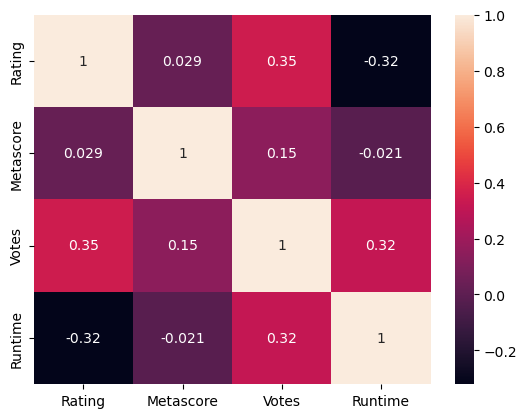

In [33]:
sns.heatmap(imdb_df.corr(),
annot=True);##heatmap

In [34]:
imdb_df.groupby('Moviename').agg({'Rating':['min','max','mean']})##groupby

Rating          
                                     min  max mean
Moviename                                         
Alice in Borderland                  7.7  7.7  7.7
American Horror Story                8.0  8.0  8.0
Andor                                8.4  8.4  8.4
Ant-Man and the Wasp: Quantumania    7.9  7.9  7.9
Avatar                               7.9  7.9  7.9
Avatar: The Way of Water             7.8  7.8  7.8
Black Adam                           6.4  6.4  6.4
Black Mirror                         8.8  8.8  8.8
Black Panther: Wakanda Forever       7.1  7.1  7.1
Dark                                 8.7  8.7  8.7
Doctor Who                           8.6  8.6  8.6
Doom Patrol                          7.8  7.8  7.8
Dune: Part One                       8.0  8.0  8.0
Everything Everywhere All at Once    8.0  8.0  8.0
Extraordinary                        8.0  8.0  8.0
Fear the Walking Dead                6.8  6.8  6.8
Fringe                               8.4  8.4  8.4
Inception                            8.8  8.8  8.8
Infinity Pool                        6.9  6.9  6.9
Interstellar                         8.6  8.6  8.6
Jung_E                               5.4  5.4  5.4
Jurassic World: Dominion             5.6  5.6  5.6
Lost                                 8.3  8.3  8.3
M3GAN                                6.4  6.4  6.4
Manifest                             7.1  7.1  7.1
Megalopolis                          6.3  6.3  6.3
Nope                                 6.9  6.9  6.9
Rick and Morty                       9.1  9.1  9.1
Severance                            8.7  8.7  8.7
Spider-Man: No Way Home              8.2  8.2  8.2
Star Trek: The Next Generation       8.7  8.7  8.7
Star Wars: The Bad Batch             7.8  7.8  7.8
Strange World                        5.6  5.6  5.6
Stranger Things                      8.7  8.7  8.7
The Boys                             8.7  8.7  8.7
The Flash                            7.6  7.6  7.6
The Handmaid's Tale                  8.4  8.4  8.4
The Last of Us                       9.3  9.7  9.5
The Mandalorian                      8.7  8.7  8.7
The Peripheral                       7.7  7.7  7.7
The Rig                              5.8  5.8  5.8
The Sandman                          7.7  7.7  7.7
The Super Mario Bros. Movie          8.7  8.7  8.7
The Wandering Earth 2                8.0  8.0  8.0
The X Files                          8.6  8.6  8.6
Thor: Love and Thunder               6.3  6.3  6.3
Titans                               7.6  7.6  7.6
Vesper                               5.9  5.9  5.9
Westworld                            8.5  8.5  8.5

## HISTOGRAM

<AxesSubplot:ylabel='Frequency'>

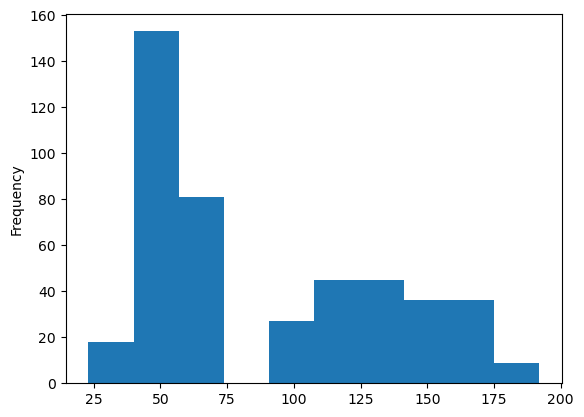

In [35]:
imdb_df['Runtime'].plot(kind='hist', bins=10)##histogram of runtime

#OBSERVATION
from the above graph we can observe that the runtime for more movies is in between 48 to 65

<AxesSubplot:ylabel='Frequency'>

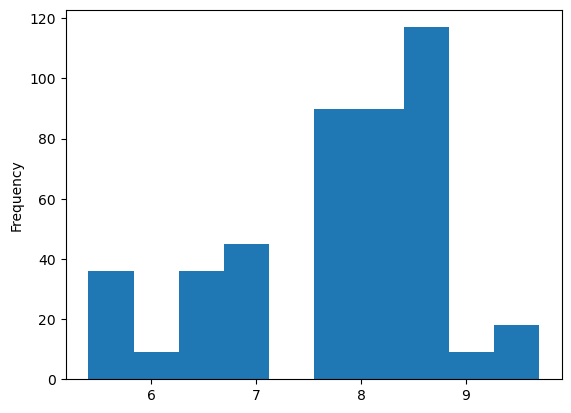

In [36]:
imdb_df['Rating'].plot(kind='hist', bins=10)

#OBSERVATION
from the above graph we can observe that the Rating is high in between 8.6 to 8.8 and totally low between 8.9 to 9.2

<AxesSubplot:ylabel='Frequency'>

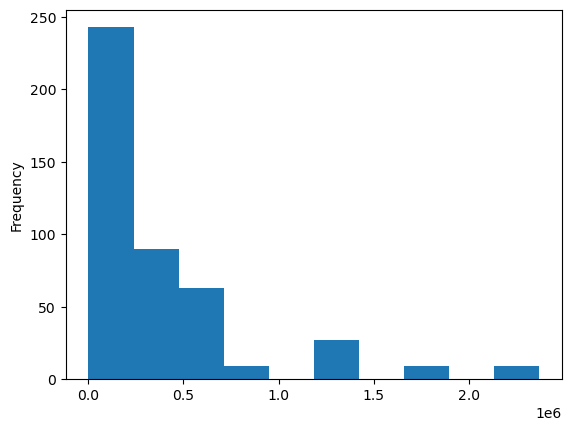

In [37]:
imdb_df['Votes'].plot(kind='hist', bins=10)

#OBSERVATION
from the above graph we can observe that the votes are high in between 0.0 to 0.3 and totally low between 1.5 to 2.0

<AxesSubplot:ylabel='Frequency'>

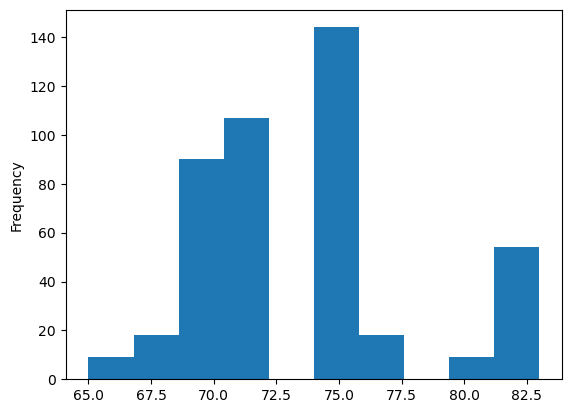

In [38]:
imdb_df['Metascore'].plot(kind='hist', bins=10)

#OBSERVATION
from the above graph we can observe that the metascore is high in between 75.0 to 75.5 and totally low between 80.0 to 81.0

## BAR PLOT

Text(0, 0.5, 'Rating')

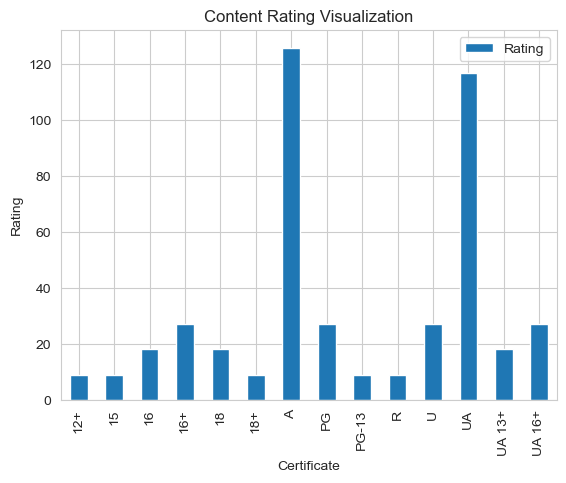

In [59]:
imdb_df[['Rating','Certificate']].groupby('Certificate').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Certificate')
plt.ylabel('Rating')##barplot b/w Rating and certificate


#OBSERVATION
We can observe from the above plot that 'A' rating is high and at the second highest we have 'UA' movies

Text(0, 0.5, 'Metascore')

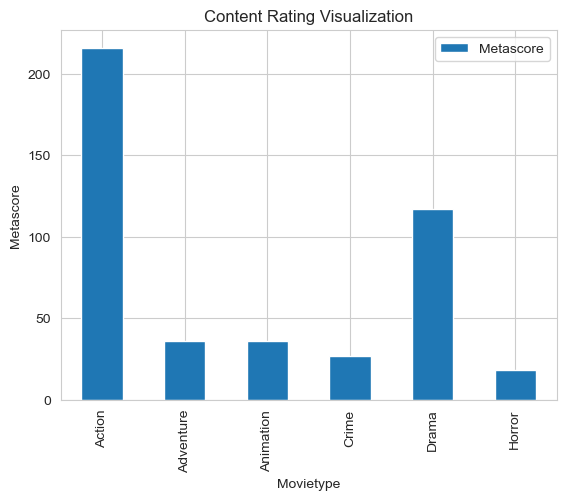

In [80]:
imdb_df[['Metascore','Movietype']].groupby('Movietype').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Movietype')
plt.ylabel('Metascore')##barplot b/w Rating and certificate


#OBSERVATION
we can observe that the action movies has highest metascore compared to others

## BOX PLOT

<AxesSubplot:>

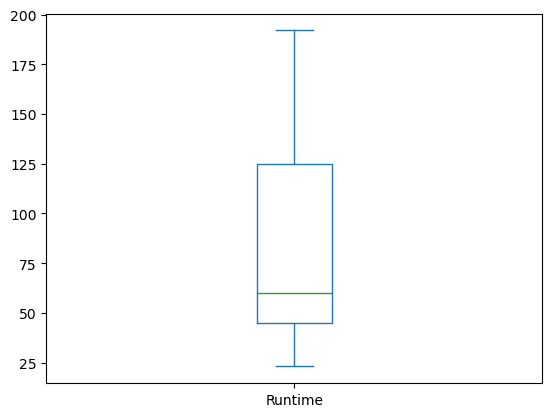

In [40]:
imdb_df['Runtime'].plot(kind='box')##box plot of runtime


In [ ]:
#OBSERVATION


<AxesSubplot:xlabel='Runtime', ylabel='Rating'>

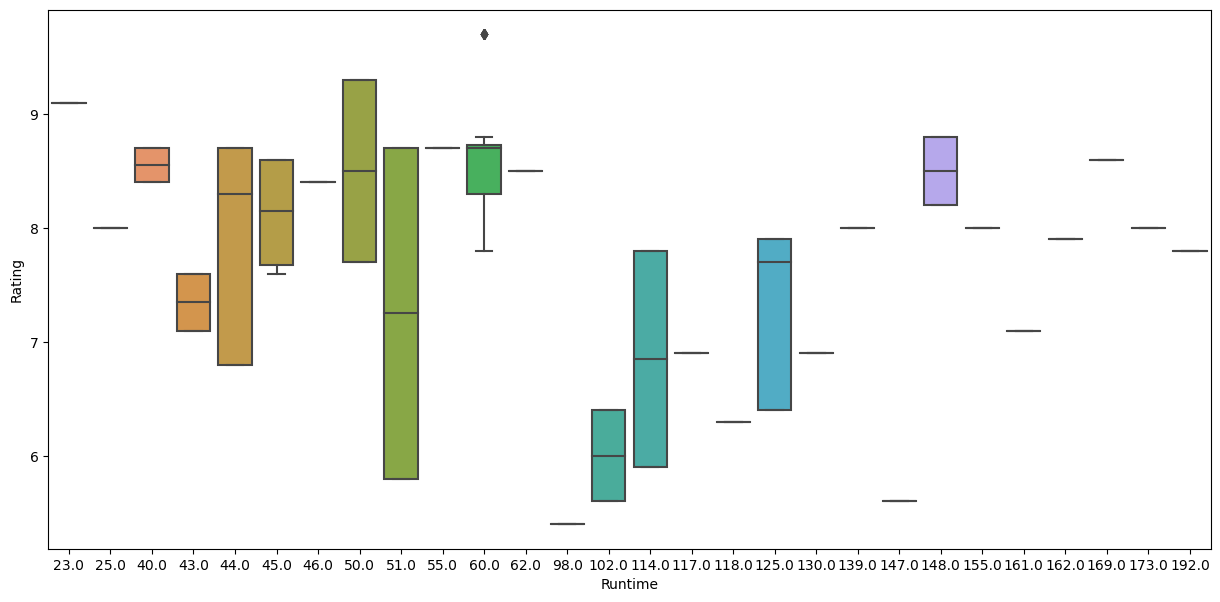

In [41]:
plt.figure(figsize =(15,7))
sns.boxplot(x = imdb_df.Runtime, y = imdb_df.Rating)

In [ ]:
#OBSERVATION


## SCATTER PLOT

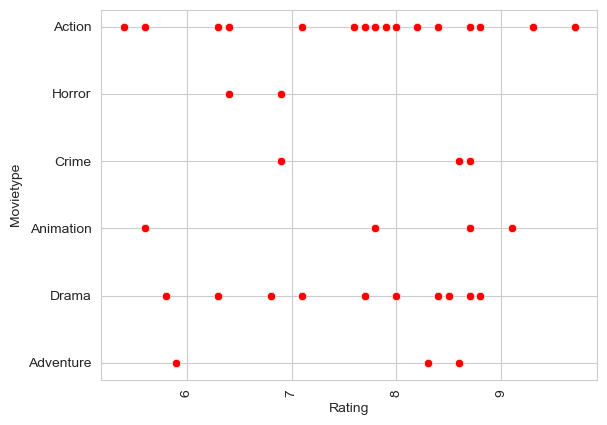

In [61]:
sns.scatterplot(data=imdb_df,y='Movietype',x='Rating',color='red')
plt.xticks(rotation =90)
plt.show()
##scatter plot for moviename and certificate

#OBSERVATION
from the above graph we can observe that the graph has increased from 5 to 10 for action movies

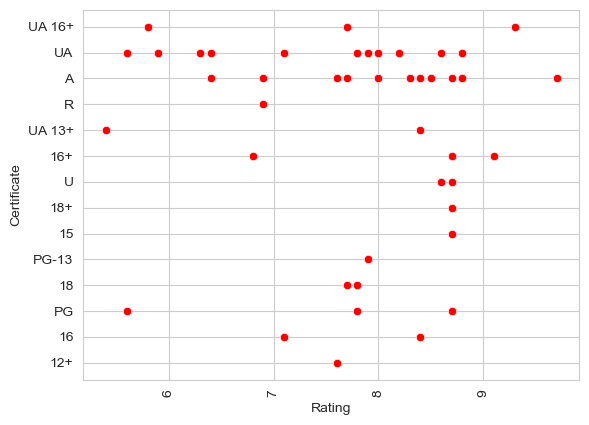

In [84]:
sns.scatterplot(data=imdb_df,x='Rating',y='Certificate',color='red')
plt.xticks(rotation =90)
plt.show()

#OBSERVATION
from the above graph we can observe that 'A' certificate movies have higher rating compared to other certificates

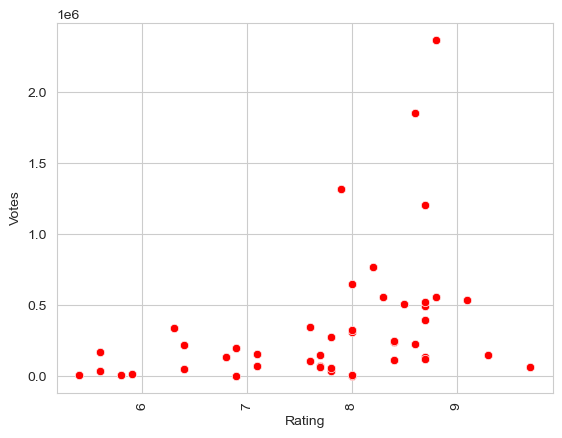

In [87]:
sns.scatterplot(data=imdb_df,x='Rating',y='Votes',color='red')
plt.xticks(rotation =90)
plt.show()

## DISTRIBUTION PLOT

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

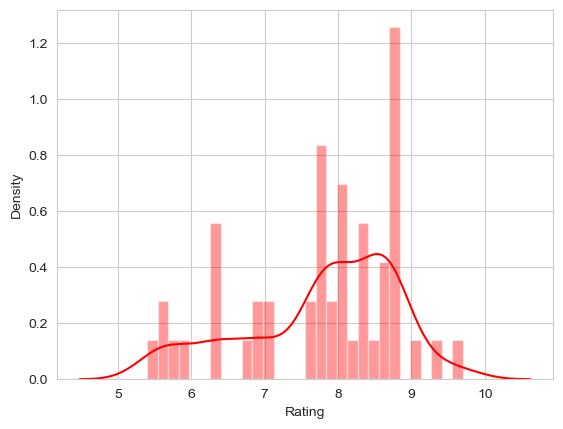

In [44]:
sns.set_style('whitegrid')
sns.distplot(imdb_df['Rating'], kde = True, color ='red', bins = 30)

#OBSERVATION
We can observe from the above plot that most of the movie ratings has been increased at the rate of 8.9 and after 9 the rating between the 9-10 are for less movies 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Metascore', ylabel='Density'>

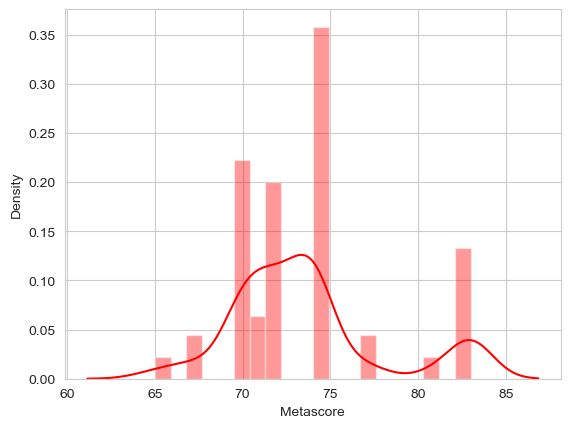

In [75]:
sns.set_style('whitegrid')
sns.distplot(imdb_df['Metascore'], kde = True, color ='red', bins = 20)

## Count plot

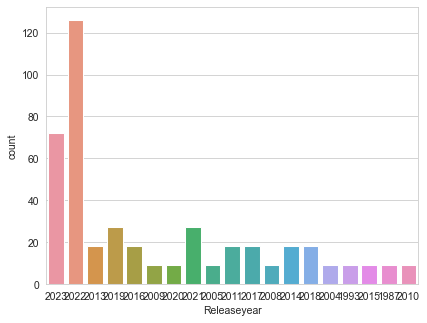

In [46]:
plt.figure(dpi = 75)
sns.countplot(x='Releaseyear',data=imdb_df);

#OBSERVATION
We can observe from the above plot that most of the movies are released in the year of '2022' and second highest release is in '2019'

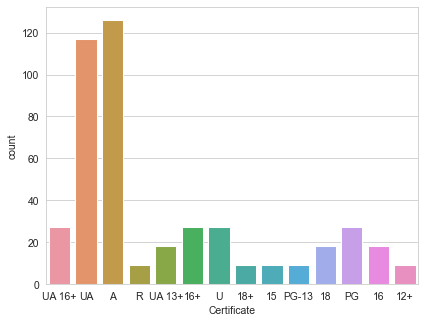

In [47]:
plt.figure(dpi = 75)
sns.countplot(x='Certificate',data=imdb_df);

#OBSERVATION
We can observe from the above plot that 'UA' certificate movies are highly viewed compared to other certifcates and at the second position we have 'A' certificate movies 

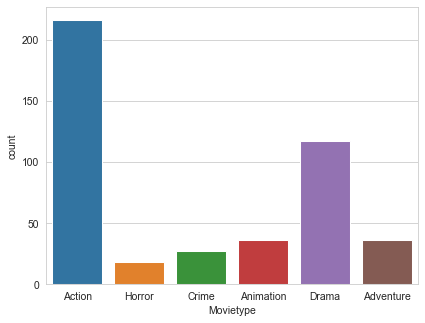

In [70]:
plt.figure(dpi = 75)
sns.countplot(x='Movietype',data=imdb_df);

#OBSERVATION
from the above plot we can tell that Action movies are highly watched compared to other movies